PCA visualization:


PCA Explained Variance Ratio: [0.85322867 0.13884013]

Top 5 Potential Outliers:
           alt   mach  speed_ias  speed_tas   Distance  Cluster
25673  32250.0  0.624      720.0      460.0  12.004865        0
35252  32000.0  0.636      596.0      462.0   8.715609        1
21494  41000.0  0.336      596.0      492.0   8.456767        0
23416   8250.0  0.128      572.0      284.0   8.026528        0
33009  40975.0  0.104      564.0      486.0   7.387350        0


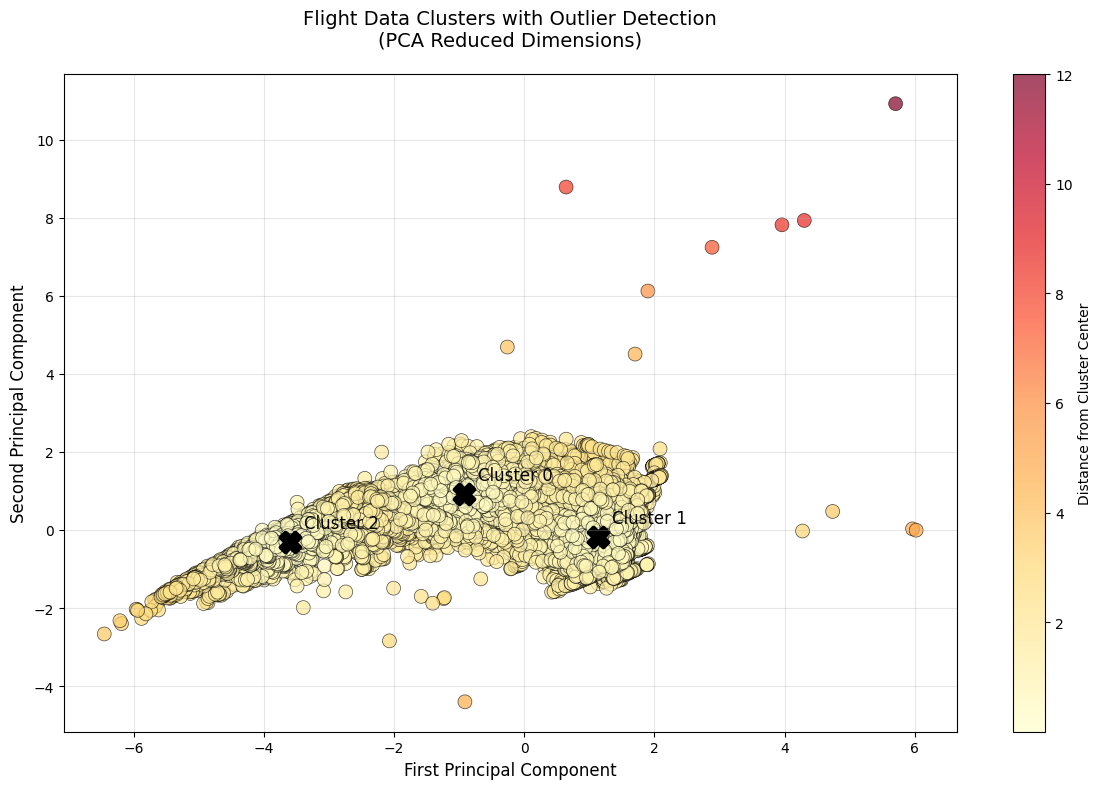

In [14]:
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read and process JSON data
with open('data.json', 'r') as file:
    data = json.load(file)
    if isinstance(data, dict):
        data = [data]

# Extract relevant features
features = ['alt', 'mach', 'speed_ias', 'speed_tas']
df = pd.DataFrame(data)[features]

# Convert to numeric, handling any non-numeric values
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Apply K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Calculate distances from cluster centers
centers_transformed = pca.transform(kmeans.cluster_centers_)
distances = np.min([np.linalg.norm(pca_result - center, axis=1) 
                   for center in centers_transformed], axis=0)

# Create the plot with white background
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Create scatter plot with distances as colors
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=distances,  # Color by distance
                     cmap='YlOrRd',  # Yellow to Orange to Red colormap
                     s=100,
                     alpha=0.7,
                     edgecolor='black',
                     linewidth=0.5)

# Plot cluster centers
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1],
           c='black', marker='X', s=200, linewidth=3,
           label='Cluster Centers')

# Add cluster labels
for i in range(n_clusters):
    center = centers_transformed[i]
    plt.annotate(f'Cluster {i}',
                xy=(center[0], center[1]),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=12,
                color='black')

# Add title and labels
plt.title('Flight Data Clusters with Outlier Detection\n(PCA Reduced Dimensions)', 
          fontsize=14, pad=20)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

# Add the colorbar using the scatter plot
cbar = plt.colorbar(scatter, label='Distance from Cluster Center')
cbar.ax.set_ylabel('Distance from Cluster Center', fontsize=10)

# Add grid
plt.grid(True, alpha=0.3)

# Print explained variance ratio
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print summary of points furthest from their cluster centers (potential outliers)
df['Distance'] = distances
df['Cluster'] = clusters
print("\nTop 5 Potential Outliers:")
print(df.nlargest(5, 'Distance')[features + ['Distance', 'Cluster']])

plt.tight_layout()
plt.show()

3D visualization (TAS IAS and ALT)

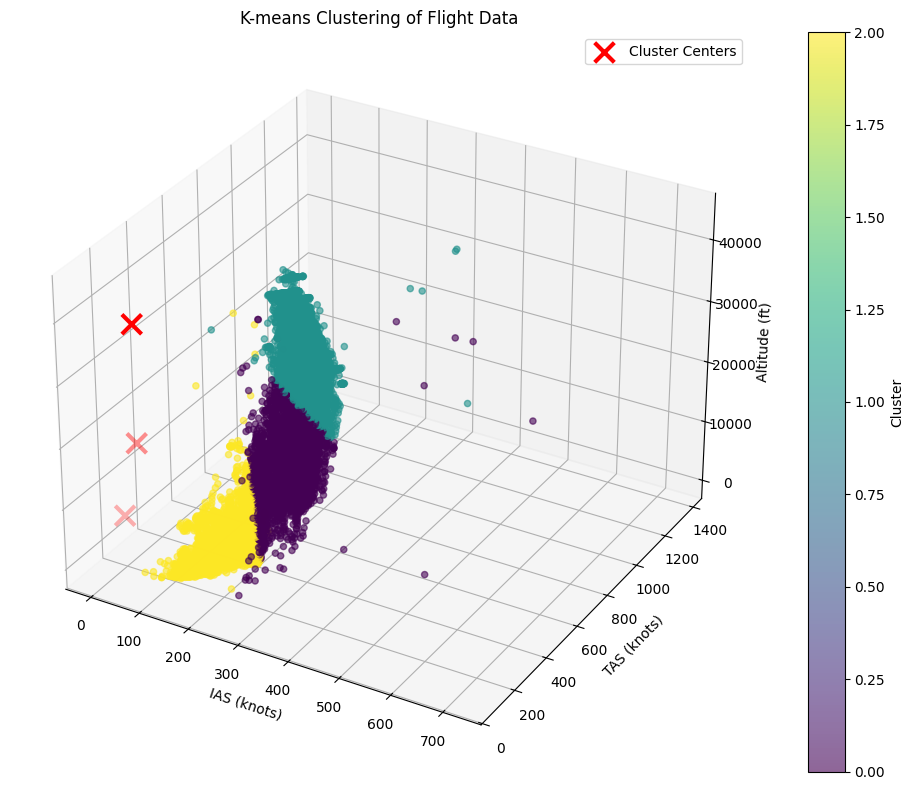


Cluster Summary Statistics:

Cluster 0:
                alt         mach    speed_ias    speed_tas  Cluster
count   5712.000000  5712.000000  5712.000000  5712.000000   5712.0
mean   15701.527486     0.554696   273.769608   352.262430      0.0
std     5757.442707     0.087957    26.592283    50.451326      0.0
min      175.000000     0.104000   189.000000   106.000000      0.0
25%    11018.750000     0.468000   250.000000   302.000000      0.0
50%    15950.000000     0.568000   273.000000   360.000000      0.0
75%    20356.250000     0.628000   296.000000   394.000000      0.0
max    41000.000000     0.852000   720.000000   500.000000      0.0

Cluster 1:
                alt          mach     speed_ias     speed_tas  Cluster
count  20043.000000  20043.000000  20043.000000  20043.000000  20043.0
mean   35081.241581      0.795804    269.759018    467.963329      1.0
std     4172.501394      0.042045     19.310831     24.382973      0.0
min    20475.000000      0.352000     92.000000    

In [11]:
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read and process JSON data
with open('data.json', 'r') as file:
    data = json.load(file)
    if isinstance(data, dict):  # If single record
        data = [data]

# Extract relevant features
features = ['alt', 'mach', 'speed_ias', 'speed_tas']
df = pd.DataFrame(data)[features]

# Convert to numeric, handling any non-numeric values
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Train K-means model (using 3 clusters as an example)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Create 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(df['speed_ias'], 
                    df['speed_tas'], 
                    df['alt'],
                    c=clusters, 
                    cmap='viridis',
                    alpha=0.6)

# Add labels and title
ax.set_xlabel('IAS (knots)')
ax.set_ylabel('TAS (knots)')
ax.set_zlabel('Altitude (ft)')
plt.title('K-means Clustering of Flight Data')

# Add colorbar
plt.colorbar(scatter, label='Cluster')

# Add cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 1], centers[:, 2], centers[:, 0], 
           c='red', marker='x', s=200, linewidth=3, 
           label='Cluster Centers')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics for each cluster
print("\nCluster Summary Statistics:")
df['Cluster'] = clusters
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i].describe())